In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importation des données

In [3]:
df=pd.read_csv('fichier.csv')
df.head()
df = df[df.default_flag == 1]

/var/folders/r0/t40rvcvx3k17bl86tv5f28_r0000gn/T/ipykernel_3194/2533165777.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('fichier.csv')


## Partie Lise

In [4]:
dfl = df


## Partie Romain

In [5]:
dfr = df


## Partie Ombline

In [6]:
dfo = df


### Étude des températures des planètes ###

In [7]:
temperature = dfo["st_teff"]

Regardons quelle est la tendance de température des planètes.

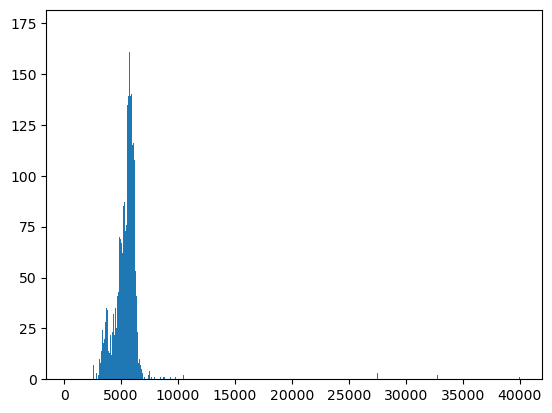

In [8]:
plt.hist(temperature, bins=1000)
plt.show()

On voit qu'une température est privilégiée, regardons laquelle.

In [15]:
temperature.describe()

count     4929.00000
mean      5420.06057
std       1507.13282
min        415.00000
25%       4953.00000
50%       5556.00000
75%       5904.00000
max      40000.00000
Name: st_teff, dtype: float64

On lit que la moyenne de température est de 5420.06057 K.
Étudions à présent le rayon des planètes.

### Étude du rayon des planètes

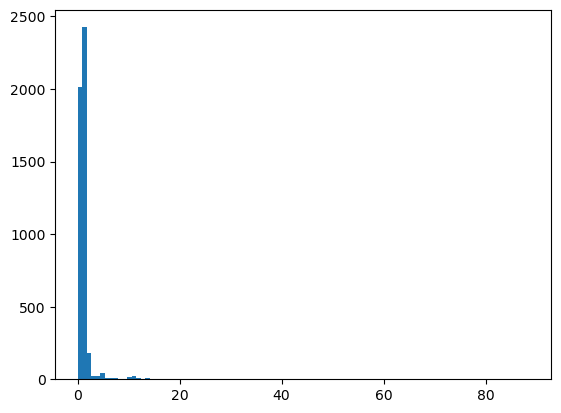

In [10]:
rayon = dfo["st_rad"]
plt.hist(rayon, bins = 100)
plt.show()

On voit qu'il y a peu de données au dessus de 20 rayons du Soleil.
On va donc afficher un histogramme qui ne prend en compte que les données en dessous de cette valeur.

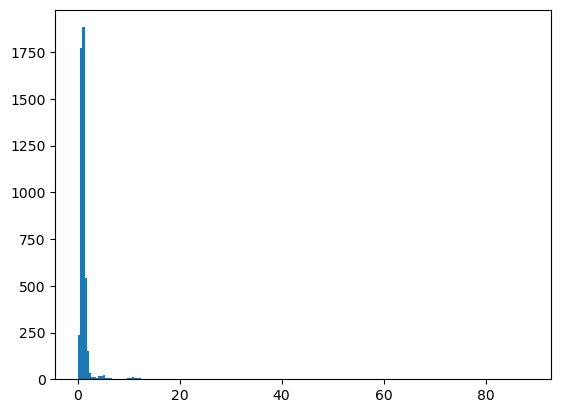

In [14]:
plt.hist(rayon, bins=200, )
plt.show()

# comment faire ?


Regardons à présent de manière générale les données relatives au rayon des planètes.

In [21]:
rayon.describe()

count    4839.000000
mean        1.517778
std         3.909116
min         0.010000
25%         0.780000
50%         0.950000
75%         1.240000
max        88.470000
Name: st_rad, dtype: float64

### Étude de la masse des planètes

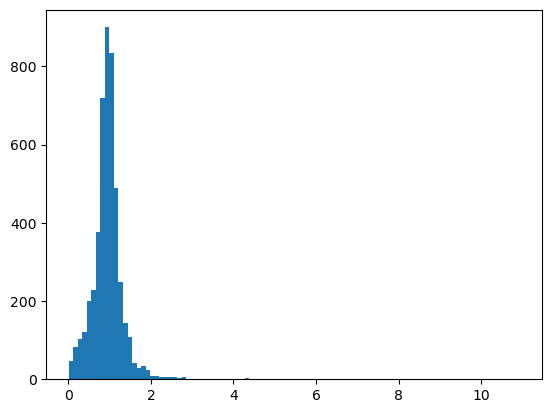

In [24]:
masse = dfo["st_mass"]
plt.hist(masse, bins = 100)
plt.show()

On voit qu'une masse est privilégiée, regardons laquelle.

In [25]:
masse.describe()

count    4787.000000
mean        0.955997
std         0.448734
min         0.010000
25%         0.780000
50%         0.950000
75%         1.100000
max        10.940000
Name: st_mass, dtype: float64

On lit que la moyenne de masse est 0.955997 la masse du Soleil.

### Étude de la métallicité des planètes

*Métallicité : (d'un objet astronomique) la fraction de sa masse qui n'est pas constituée d'hydrogène ou d'hélium*

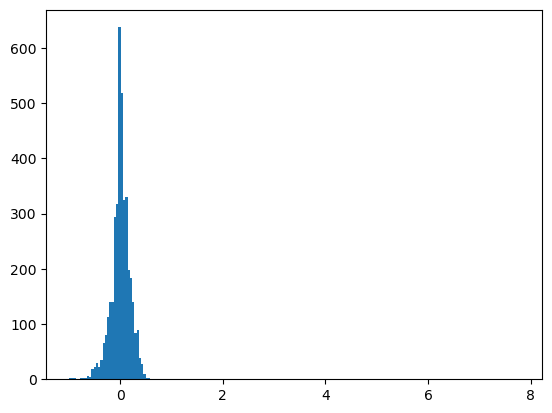

In [27]:
metal = dfo["st_met"]
plt.hist(metal, bins = 200)
plt.show()

On voit que la métallicité des planètes se concentre autour d'une valeur.

In [28]:
metal.describe()

count    3885.000000
mean        0.010949
std         0.221377
min        -1.000000
25%        -0.080000
50%         0.016000
75%         0.119000
max         7.790000
Name: st_met, dtype: float64

Cette valeur est 0,011. Les planètes sont donc en majorité constituées principalement d'hélium et d'hydrogène.

## Partie Camille

Analysons la répartition du nombre d'étoile par système solaire


<AxesSubplot: xlabel='sy_snum'>

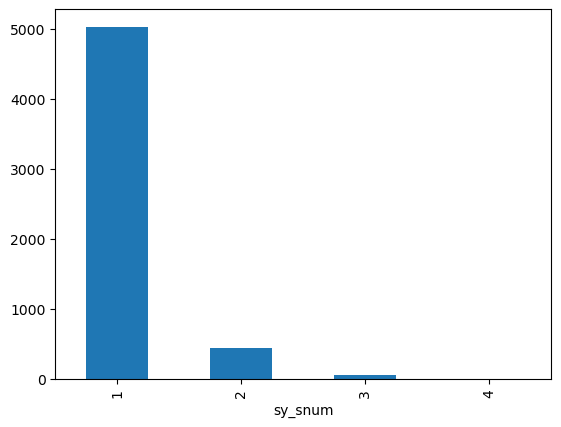

In [12]:
dfc = df
par_etoile=df.groupby(by='hostname')
dfc = df
dfc_entité=dfc[['pl_name', 'hostname', 'sy_snum', 'sy_pnum', ]]
print("Analysons la répartition du nombre d'étoile par système solaire")
dfc_entité.sy_snum.value_counts().plot(kind='bar')